In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from PIL import Image  

2025-05-31 22:49:57.396868: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 22:49:57.397887: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 22:49:57.401392: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 22:49:57.413070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-31 22:49:57.436754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
data_dir = "/home/niranjan/BTech_Project/dataset" #Path for dataset 
benign_dir = os.path.join(data_dir, "Benign")  #Benign directory name
malignant_dir = os.path.join(data_dir, "Malignant") #Malignant directory name

In [3]:
images = []
labels = []

In [4]:
def convert_to_8bit_grayscale(img_path, target_size):
    img = Image.open(img_path).convert('L')  
    img = img.resize(target_size)  
    img = np.array(img)  
    return img

Displaying some benign images:


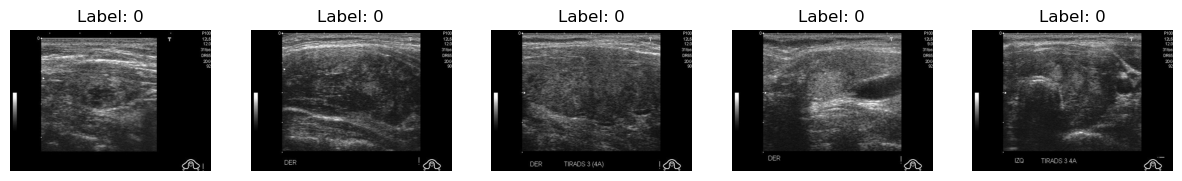

Displaying some malignant images:


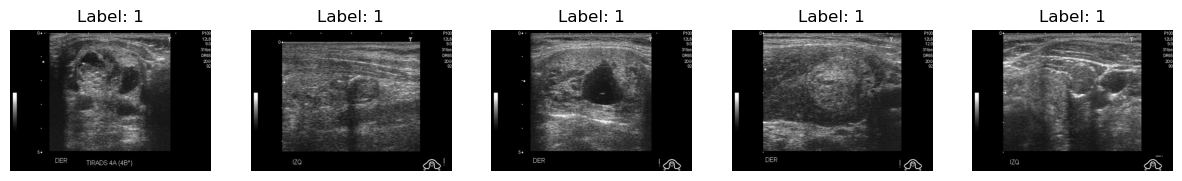

In [5]:
for img_name in os.listdir(benign_dir):
    img_path = os.path.join(benign_dir, img_name)
    img = convert_to_8bit_grayscale(img_path, (512, 360))  
    img = np.expand_dims(img, axis=-1)  
    images.append(img)
    labels.append(0)  


for img_name in os.listdir(malignant_dir):
    img_path = os.path.join(malignant_dir, img_name)
    img = convert_to_8bit_grayscale(img_path, (512, 360))  
    img = np.expand_dims(img, axis=-1)  
    images.append(img)
    labels.append(1)  


images = np.array(images)
labels = np.array(labels)

import matplotlib.pyplot as plt


def display_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')  
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()


print("Displaying some benign images:")
benign_indices = [i for i, label in enumerate(labels) if label == 0]
display_images(images[benign_indices[:5]], labels[benign_indices[:5]])


print("Displaying some malignant images:")
malignant_indices = [i for i, label in enumerate(labels) if label == 1]
display_images(images[malignant_indices[:5]], labels[malignant_indices[:5]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
images.shape

(832, 360, 512, 1)

In [8]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [9]:
model = models.Sequential([
    layers.Conv2D(6, (3, 3), activation='relu', input_shape=(512, 360, 1)),  
    layers.MaxPooling2D((2, 2)),   
    layers.ReLU(),  
    layers.Flatten(),  
    layers.Dense(2, activation='softmax') 
])

/home/niranjan/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=.2)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.5332 - loss: 1539.7373 - val_accuracy: 0.7068 - val_loss: 303.8659
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.6994 - loss: 232.0877 - val_accuracy: 0.6617 - val_loss: 160.1251
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.8350 - loss: 65.8025 - val_accuracy: 0.9323 - val_loss: 7.8898
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.8897 - loss: 23.3053 - val_accuracy: 0.8120 - val_loss: 30.2238
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.8998 - loss: 14.2872 - val_accuracy: 0.9248 - val_loss: 10.0708
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.9528 - loss: 9.9693 - val_accuracy: 0.9398 - val_loss: 7.2072
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.9050 - loss: 21.9487 - val_accuracy: 0.9774 - val_loss: 3.5965
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.9236 - loss: 14.5584 - 

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {test_acc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9375 - loss: 20.0019
Validation Accuracy: 0.9401


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Confusion Matrix:
[[63  0]
 [10 94]]


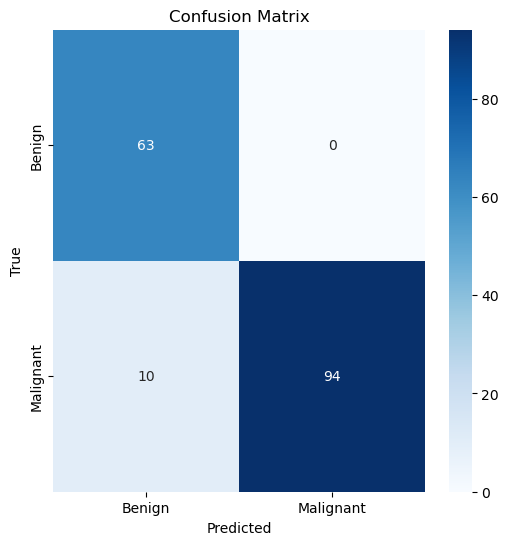

Classification Report:
              precision    recall  f1-score   support

      Benign       0.86      1.00      0.93        63
   Malignant       1.00      0.90      0.95       104

    accuracy                           0.94       167
   macro avg       0.93      0.95      0.94       167
weighted avg       0.95      0.94      0.94       167

Precision: 1.0000
Recall: 0.9038
F1-Score: 0.9495


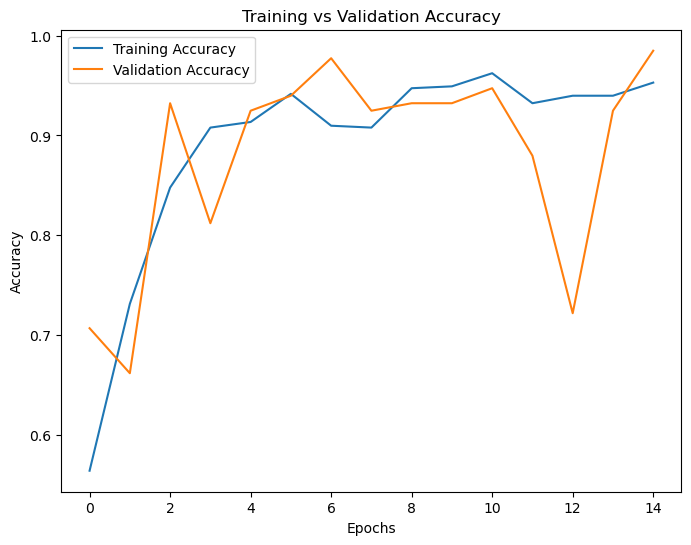

In [13]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Benign', 'Malignant']))


precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


model.save("thyroid_cnn_model.h5")


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 358, 6)    │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 179, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 255, 179, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 273870)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       547,742 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,643,408 (6.27 MB)

 Trainable params: 547,802 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,095,606 (4.18 MB)